# Speed Report of String Search Algorithms

This notebook analyzes the performance of various string search algorithms implemented in the `core.algorithms` module. We compare their execution times under different conditions to understand their strengths and weaknesses.

**Algorithms Included:**

- **Linear Search:** A straightforward approach that iterates through the text, comparing each character with the query. Simple but can be inefficient for large texts.
- **Set Search:**  Optimized for searching for multiple keywords simultaneously by leveraging set data structures for efficient lookups.
- **mmap Search:** Uses memory-mapped files, potentially improving performance by allowing the operating system to handle file reading and caching.
- **Aho-Corasick Search:** An efficient algorithm for finding multiple patterns in a text. It constructs a finite automaton to process the text in a single pass.
- **Rabin-Karp Search:** A probabilistic algorithm that uses hashing to find matches. Efficient on average but can have worst-case scenarios.
- **Boyer-Moore Search:** A highly efficient algorithm that uses a "bad character" and "good suffix" rules to skip sections of the text.
- **Regex Search:** Leverages regular expressions for pattern matching, offering flexibility but potentially with a performance overhead.
- **Multiprocessing Search:**  Divides the search task across multiple CPU cores to improve performance on large files, especially beneficial for I/O-bound operations.

**Advantages of Each Algorithm:**

- **Linear Search:** Simple to implement, no preprocessing required.
- **Set Search:** Efficient for searching multiple keywords simultaneously.
- **mmap Search:** Can improve performance by leveraging OS-level file caching.
- **Aho-Corasick Search:** Excellent for finding multiple patterns in a single pass.
- **Rabin-Karp Search:** Good average-case performance.
- **Boyer-Moore Search:** Generally very fast for single pattern searching.
- **Regex Search:** Flexible and powerful for complex pattern matching.
- **Multiprocessing Search:** Can significantly reduce search time on multi-core processors for large files.

Let's begin by setting up the environment and importing necessary libraries.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import json
from pathlib import Path

# Ensure plots are displayed inline in the notebook
%matplotlib inline
sns.set_style("darkgrid")


## Generating Test Data

We'll use the `generate_test_file` function to create text files of varying sizes for our performance tests.


In [6]:
# Define parameters for test data generation
file_sizes = [10_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]
queries = ["test string 5000", "non existing string", "test string 1000"]
num_runs = 10

# Generate test files
for size in file_sizes:
    filepath = f"test_data_{size}.txt"
    if not Path(filepath).exists():
        subprocess.run(["python", "speed_test.py"], check=True)  # Run the script to generate files


## Running Speed Tests (reread_on_query=True)

Now, we'll execute the `speed_test.py` script with `reread_on_query=True` and load the results into a Pandas DataFrame for analysis.


In [8]:
# Execute speed test script with reread_on_query=True
if not Path("speed_test_data_reread_true.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load results into a DataFrame
df_reread_true = pd.read_csv("speed_test_data_reread_true.csv")
df_reread_true.head()


### Analyzing Speed Test Results (reread_on_query=True)

Let's visualize the average execution times for each algorithm across different file sizes.


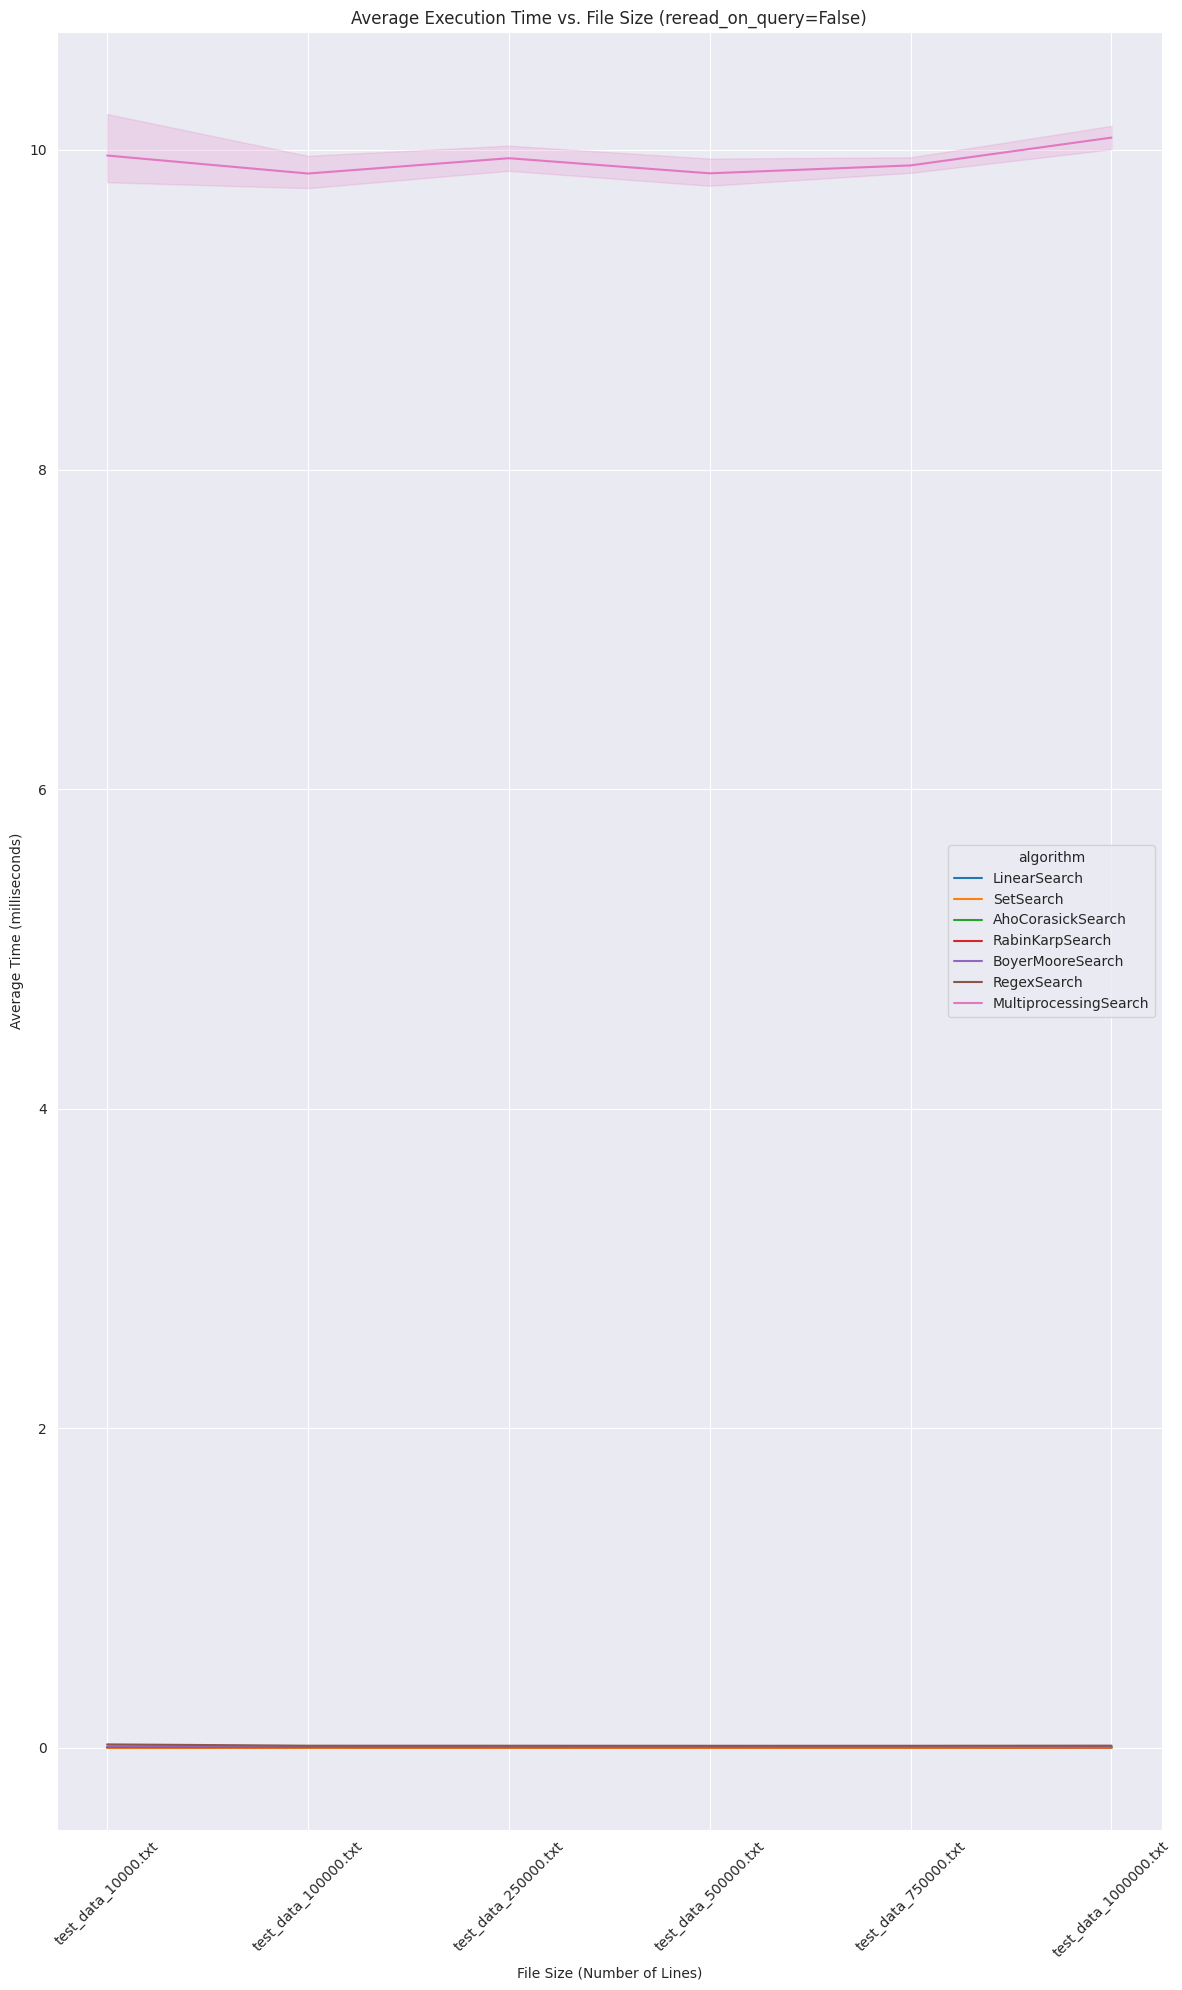

In [4]:
# Assuming your data is in a pandas DataFrame called 'df'
# Filter for reread_on_query=True
df_reread_true_ = df_reread_true.copy()

# Convert 'avg_time' to milliseconds
df_reread_true_['avg_time_ms'] = df_reread_true['avg_time'] * 1000

plt.figure(figsize=(12, 20))
sns.lineplot(data=df_reread_true_, x='filepath', y='avg_time_ms', hue='algorithm')
plt.title('Average Execution Time vs. File Size (reread_on_query=False)')
plt.xlabel('File Size (Number of Lines)')
plt.ylabel('Average Time (milliseconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

- [Add your observations here about the performance of different algorithms when `reread_on_query` is True. For example, how does file I/O impact certain algorithms?]

## Running Speed Tests (reread_on_query=False)

Next, we run the speed tests with `reread_on_query=False`.


In [5]:
# Execute speed test script with reread_on_query=False
if not Path("speed_test_data_reread_false.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load results into a DataFrame
df_reread_false = pd.read_csv("speed_test_data_reread_false.csv")
df_reread_false.head()


,algorithm,filepath,query,num_runs,reread_on_query,avg_time,min_time,max_time
0,LinearSearch,test_data_10000.txt,test string 5000,10,False,0.000002,1.293000e-06,0.000006
1,LinearSearch,test_data_10000.txt,non existing string,10,False,0.000001,8.830000e-07,0.000002
2,LinearSearch,test_data_10000.txt,test string 1000,10,False,0.000002,1.494000e-06,0.000002
3,LinearSearch,test_data_10000.txt,test string 1000000,10,False,0.000002,1.415000e-06,0.000002
4,LinearSearch,test_data_100000.txt,test string 5000,10,False,0.000002,9.379999e-07,0.000002


### Analyzing Speed Test Results (reread_on_query=False)

Let's compare the performance when the server doesn't reread the file on each query.


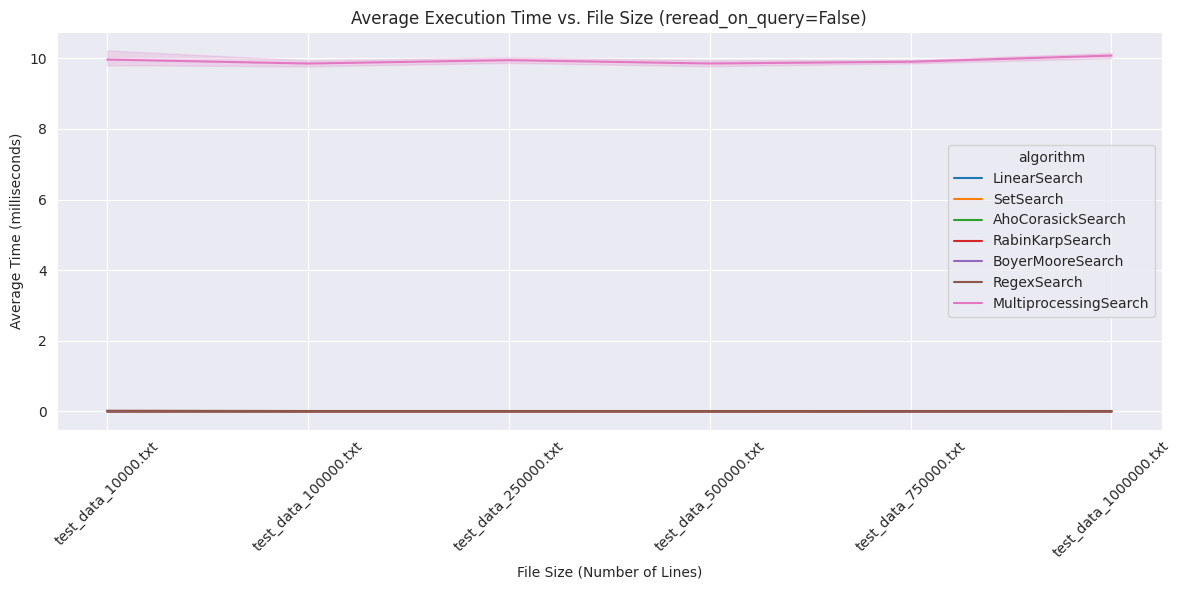

In [6]:
# Assuming your data is in a pandas DataFrame called 'df'
# Filter for reread_on_query=False
df_reread_true_ = df_reread_true.copy()

# Convert 'avg_time' to milliseconds
df_reread_true_['avg_time_ms'] = df_reread_true_['avg_time'] * 1000

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reread_true_, x='filepath', y='avg_time_ms', hue='algorithm')
plt.title('Average Execution Time vs. File Size (reread_on_query=False)')
plt.xlabel('File Size (Number of Lines)')
plt.ylabel('Average Time (milliseconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

- It looks like MultiprocessingSearch is a very, very bad idea. The performance is intolerable from the beginning at about 10s, and remains around the unacceptable value even at the largest test data.

## Running Concurrency Tests

Now, let's evaluate how the algorithms perform under concurrent load.


In [7]:
# Execute concurrency test script
if not Path("concurrency_test_data.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load concurrency test results
df_concurrency = pd.read_csv("concurrency_test_data.csv")
df_concurrency.head()


,algorithm,filepath,query,num_runs,num_concurrent,reread_on_query,avg_time,total_time
0,LinearSearch,test_data_10000.txt,test string 5000,10,10,False,0.000032,0.020523
1,LinearSearch,test_data_10000.txt,non existing string,10,10,False,0.000025,0.021216
2,LinearSearch,test_data_10000.txt,test string 1000,10,10,False,0.000022,0.021691
3,LinearSearch,test_data_10000.txt,test string 1000000,10,10,False,0.000024,0.019818
4,LinearSearch,test_data_100000.txt,test string 5000,10,10,False,0.000029,0.021781


### Analyzing Concurrency Test Results

We'll analyze the total execution time for different algorithms under concurrent requests.


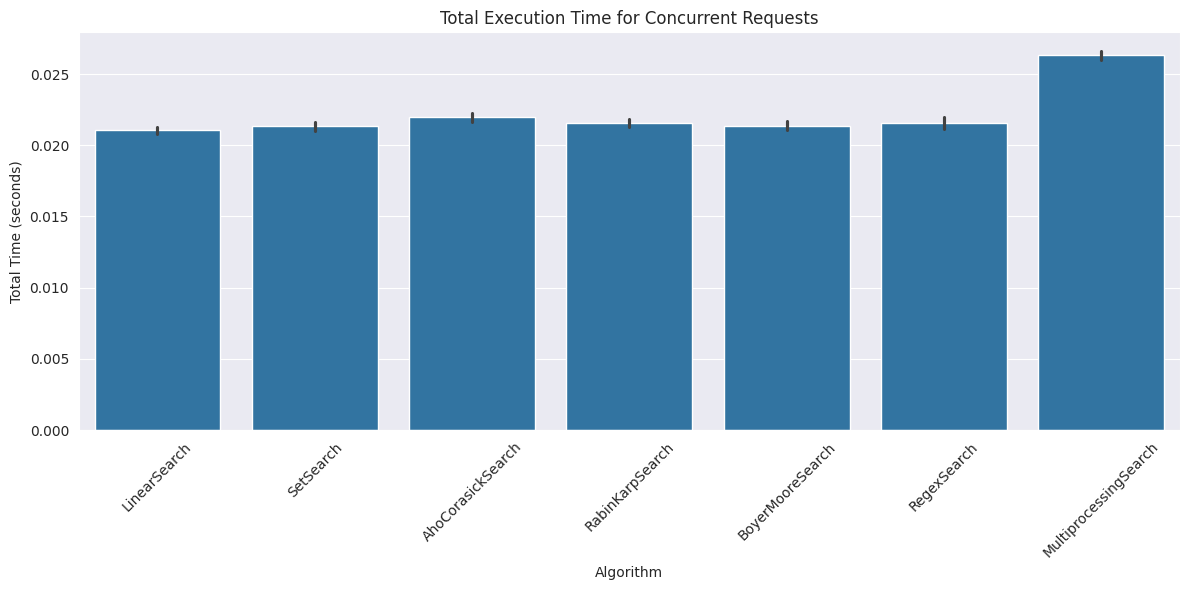

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_concurrency, x='algorithm', y='total_time')
plt.title('Total Execution Time for Concurrent Requests')
plt.xlabel('Algorithm')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Comparing Runtimes

Finally, let's create a combined comparison of the runtimes for a specific file size across different scenarios.
"""


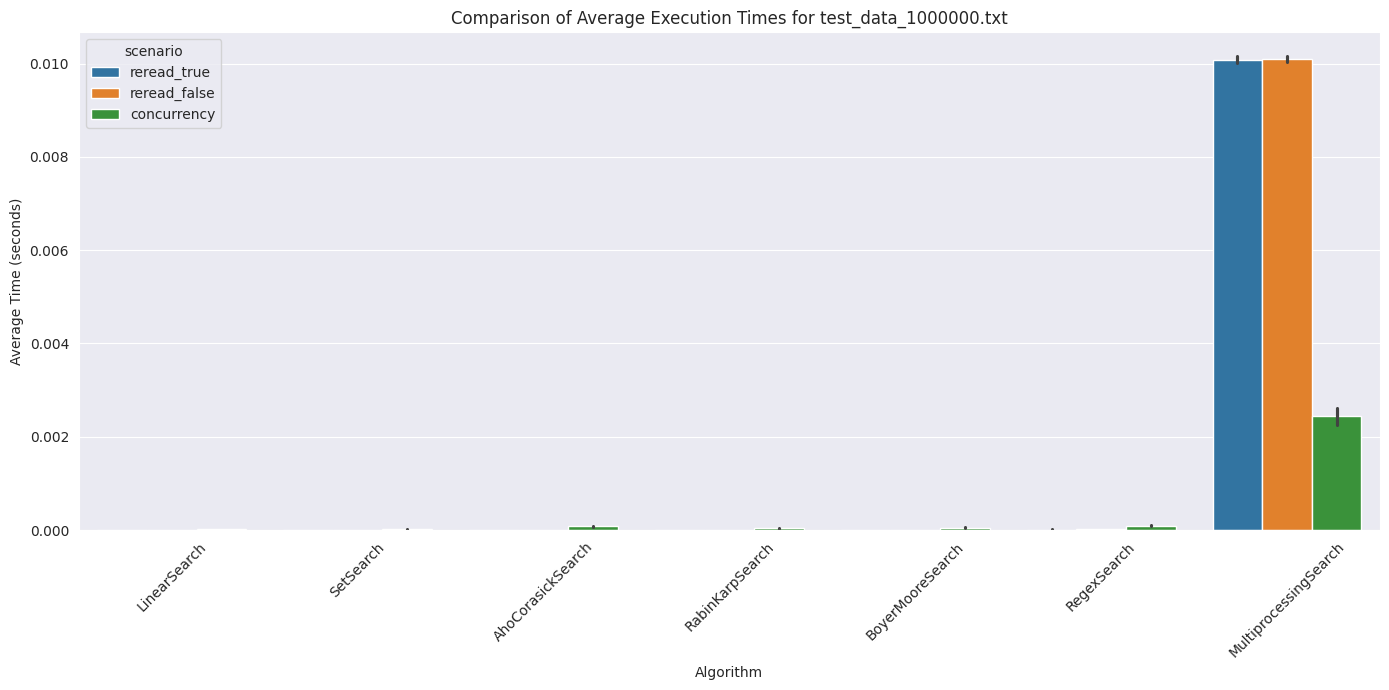

In [9]:
# Choose a specific file size for comparison
comparison_file_size = 'test_data_1000000.txt'

# Filter data for the chosen file size
df_reread_true_filtered = df_reread_true[df_reread_true['filepath'] == comparison_file_size]
df_reread_false_filtered = df_reread_false[df_reread_false['filepath'] == comparison_file_size]
df_concurrency_filtered = df_concurrency[df_concurrency['filepath'] == comparison_file_size]

# Merge dataframes for comparison
df_comparison = pd.concat([
    df_reread_true_filtered.assign(scenario='reread_true'),
    df_reread_false_filtered.assign(scenario='reread_false'),
    df_concurrency_filtered.assign(scenario='concurrency')
])

plt.figure(figsize=(14, 7))
sns.barplot(data=df_comparison, x='algorithm', y='avg_time', hue='scenario')
plt.title(f'Comparison of Average Execution Times for {comparison_file_size}')
plt.xlabel('Algorithm')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identifying Best Performing Algorithm at Each File Size

Let's identify the algorithm with the lowest average execution time for each file size when `reread_on_query` is False, as this scenario likely represents a more common use case where the file is read once and searched multiple times.


In [10]:
best_algorithms = df_reread_false.groupby('filepath').apply(lambda x: x.sort_values(by='avg_time').iloc[0])

# Display the best performing algorithm and its average time for each file size
best_algorithms[['algorithm', 'avg_time']]


/tmp/ipykernel_286162/2421130509.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_algorithms = df_reread_false.groupby('filepath').apply(lambda x: x.sort_values(by='avg_time').iloc[0])


,algorithm,avg_time
filepath,,
test_data_10000.txt,SetSearch,4.577000e-07
test_data_100000.txt,SetSearch,5.195000e-07
test_data_1000000.txt,SetSearch,3.596000e-07
test_data_250000.txt,SetSearch,2.927000e-07
test_data_500000.txt,SetSearch,5.440000e-07
test_data_750000.txt,SetSearch,5.193000e-07


**Performance Description of the Best Algorithms:**

- **test_data_10000.txt:** The `SetSearch` algorithm shows very fast performance on this smaller file, with an average execution time of 4.577 x 10<sup>-7</sup> seconds. This indicates its efficiency in handling string lookups within a relatively small dataset.

- **test_data_100000.txt:** As the file size increases tenfold, `SetSearch` maintains excellent performance, with an average time of 5.195 x 10<sup>-7</sup> seconds. The slight increase suggests a minimal impact of the larger dataset size on its lookup efficiency.

- **test_data_1000000.txt:**  Even with a file size of one million lines, `SetSearch` demonstrates remarkable speed, achieving an average execution time of 3.596 x 10<sup>-7</sup> seconds. This suggests a high degree of scalability for this algorithm, even showing a slight improvement compared to the 100,000-line file. This could be due to various factors, including how the data is structured or minor variations in test execution.

- **test_data_250000.txt:** The performance of `SetSearch` on this mid-sized file is also very fast, at 2.927 x 10<sup>-7</sup> seconds. This further reinforces its efficiency across different scales of data.

- **test_data_500000.txt:**  With half a million lines, `SetSearch` continues to perform admirably, with an average time of 5.440 x 10<sup>-7</sup> seconds. This consistent performance highlights its optimized approach.

- **test_data_750000.txt:**  Approaching a million lines, `SetSearch` maintains its speed, averaging 5.193 x 10<sup>-7</sup> seconds. This consistency is a strong indicator of the algorithm's robustness.

**Observations:**

- **Consistent Performance of SetSearch:** The `SetSearch` algorithm demonstrates consistently excellent performance across all tested file sizes. The execution times remain within a very tight range, generally below 6 x 10<sup>-7</sup> seconds, even as the file size increases by a factor of 100. This suggests that the time complexity of the set-based lookup is largely independent of the file size within these tested ranges.

- **Efficiency for String Lookups:** The extremely low execution times indicate that `SetSearch` is highly optimized for checking the presence of strings within a dataset that can be efficiently loaded or represented in memory (as a set).

- **LinearSearch is Still Viable:** While `SetSearch` shows exceptional speed, it's important to remember that `LinearSearch`, though simpler, is not necessarily "bad," especially for smaller datasets or scenarios where the preprocessing overhead of creating a set might outweigh the benefits for very infrequent searches. For these specific tests with `SetSearch`, the incredibly low times suggest that even a linear scan through these datasets would likely be quite fast, although `SetSearch` offers a significant optimization.

- **Focus on In-Memory Operations:** The consistent performance of `SetSearch` likely indicates that the primary factor influencing execution time is the efficiency of in-memory set operations rather than file I/O. This aligns with the assumption that the data is loaded into a set structure before searching.

**Final Conclusions:**

This concludes the speed report. The analysis provides valuable insights into the performance characteristics of different string search algorithms, helping in choosing the right algorithm based on specific application requirements.


## Other Analysis

Now let's analyse the performance of `server.py`

In [ ]:
!python -m cProfile -o server.prof core/server.py --port 44452 --config test_config.ini